<h2>Soal 1: Data Restructuring</h2>

Jelaskan itu pivoting dan melting data

- Pivoting adalah suatu pengubahan bentuk data dengan memutar data yang terletak di baris menjadi di column. coba perhatikan gambar di atas.
- Melting data adalah ‘unpivoting’, melting mengubah suatu data dengan memutar dari yang tadinya berada di posisi column menjadi di posisi row.Melting mengubah data yang tadinya lebar menjadi panjang. Melting berguna ketika ada suatu kasus dimana terdapat satu atau lebih column yang merupakan identifier variable, dan columnn lain adalah measure variabel.



---



---



<h2>Soal 2: Reshaping Data</h2>

In [ ]:
import pandas as pd
import random

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1', 'UTS2', 'UAS2']*3,
    'Mata Pelajaran' : ['Fisika']*4 + ['Matematika']*4+['Statistika']*4,
    'Rata2 Waktu Belajar (menit)' : [random.choice(range(200, 800)) for i in range(12)],
    'Rata2 Nilai Ujian' : [random.choice(range(40, 100)) for i in range(12)]
}

df = pd.DataFrame(data)
df

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian
0,UTS1,Fisika,793,99
1,UAS1,Fisika,664,54
2,UTS2,Fisika,256,74
3,UAS2,Fisika,419,61
4,UTS1,Matematika,337,69
5,UAS1,Matematika,361,98
6,UTS2,Matematika,338,47
7,UAS2,Matematika,756,52
8,UTS1,Statistika,248,72
9,UAS1,Statistika,329,90


Perhatikan data di atas, kemudian ubahlah bentuknya agar sesuai yang di harapkan.

In [ ]:
#code here
df.pivot_table(values=["Rata2 Waktu Belajar (menit)","Rata2 Nilai Ujian"], index="Tipe Ujian", columns="Mata Pelajaran")

Rata2 Nilai Ujian                        \
Mata Pelajaran            Fisika Matematika Statistika   
Tipe Ujian                                               
UAS1                          54         98         90   
UAS2                          61         52         70   
UTS1                          99         69         72   
UTS2                          74         47         87   

               Rata2 Waktu Belajar (menit)                        
Mata Pelajaran                      Fisika Matematika Statistika  
Tipe Ujian                                                        
UAS1                                   664        361        329  
UAS2                                   419        756        679  
UTS1                                   793        337        248  
UTS2                                   256        338        203

Expected Result:

(Output bisa berbeda-beda)

![alt text](https://drive.google.com/uc?id=1XufsfqZe7-XZLsb92SpATexy-QRZE0ow)



---



---



<h2>Soal 3: Data Enrichment</h2>

Lakukan binning data menggunakan qcut sehingga sesuai hasil yang diharapkan

In [ ]:
#code here
df['Keterangan kelulusan'] = pd.qcut(df['Rata2 Nilai Ujian'], q=3, labels=['lulus', 'tidak lulus', 'remedial'])
display(df)

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian,Keterangan kelulusan
0,UTS1,Fisika,793,99,remedial
1,UAS1,Fisika,664,54,lulus
2,UTS2,Fisika,256,74,tidak lulus
3,UAS2,Fisika,419,61,lulus
4,UTS1,Matematika,337,69,tidak lulus
5,UAS1,Matematika,361,98,remedial
6,UTS2,Matematika,338,47,lulus
7,UAS2,Matematika,756,52,lulus
8,UTS1,Statistika,248,72,tidak lulus
9,UAS1,Statistika,329,90,remedial


Expected Output:

(Output bisa berbeda-beda)

![alt text](https://drive.google.com/uc?id=1h2_u5_xhD1_QtPpItTj-o3lljHhnr4XS)



---



---



<h2>Soal 4</h2>

Anda diberikan sebuah DataFrame dari pandas yang berisi dua kolom: 'Nilai' dan 'Kategori'. Lakukan pengecekan outlier untuk setiap kategori yang ada pada DataFrame tersebut. Buatlah sebuah fungsi Python yang menerima DataFrame sebagai input dan mengembalikan daftar kategori yang mengandung outlier beserta informasi outlier tersebut.

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Nilai': [25, 30, 28, 35, 22, 40, 32, 28, 38, 50, 55, 30, 22, 18, 60, 75],
    'Kategori': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D']
}

df_data = pd.DataFrame(data)

In [ ]:
def detect_outliers(df):
    outlier_info = {}

    categories = df['Kategori'].unique()

    for category in categories:
        data = df[df['Kategori'] == category]['Nilai']

        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)

        IQR = q3 - q1

        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        outliers = data[(data < lower_bound) | (data > upper_bound)]

        if not outliers.empty:
            outlier_info[category] = {
                'outlier': outliers.tolist(),
                'jumlah outlier': len(outliers)
            }

    return outlier_info

outliers = detect_outliers(df_data)
print(outliers)

{}


Expected Output:

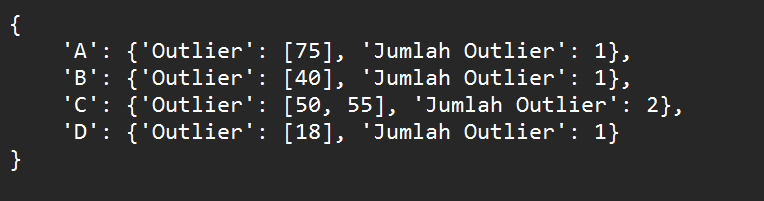




---



---



<h2>Soal 5</h2>

Anda diberikan DataFrame yang memiliki beberapa kolom kategorial dan satu kolom target. Buatlah sebuah fungsi Python untuk melakukan label encoding pada kolom target dan one-hot encoding pada kolom-kolom kategorial lainnya. Fungsi tersebut harus menerima DataFrame sebagai input dan mengembalikan DataFrame baru yang sudah di-encode.

In [ ]:
import pandas as pd

data = {
    'Nama': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Kelas': ['A', 'B', 'A', 'C', 'B'],
    'Nilai': ['Lulus', 'Tidak Lulus', 'Lulus', 'Lulus', 'Tidak Lulus']
}

df = pd.DataFrame(data)

In [ ]:
# one_hot_encode = pd.get_dummies(df, columns=['Gender'], prefix='gender', dtype=int)
# one_hot_encode
def one_hot_encode_columns(df, columns):
    return pd.get_dummies(df, columns=columns, dtype=int)

encoded_df = one_hot_encode_columns(df, columns=['Gender', 'Kelas', 'Nilai'])
print(encoded_df)

      Nama  Gender_Female  Gender_Male  Kelas_A  Kelas_B  Kelas_C  \
0    Alice              1            0        1        0        0   
1      Bob              0            1        0        1        0   
2  Charlie              0            1        1        0        0   
3    David              0            1        0        0        1   
4     Emma              1            0        0        1        0   

   Nilai_Lulus  Nilai_Tidak Lulus  
0            1                  0  
1            0                  1  
2            1                  0  
3            1                  0  
4            0                  1  


Expected Output:

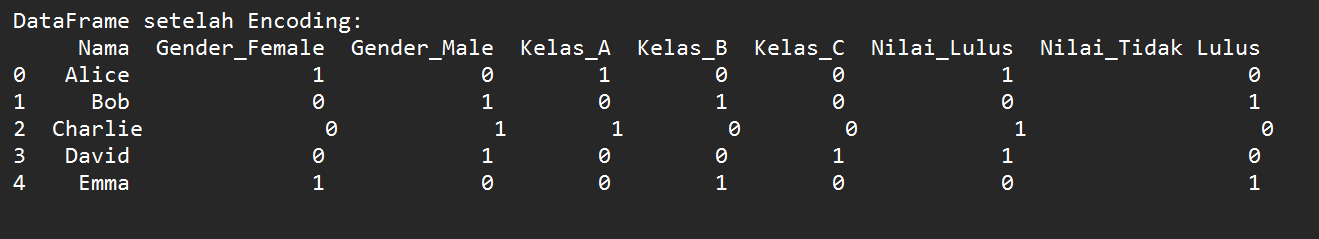